In [1]:
#MLP ---> Multi Layer Perceptron
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn .neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
iris=load_iris()
X= iris.data
y= iris.target

In [3]:
#Veri setini eğitim ve test setlerine böl
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.25,random_state=1)


#Verileri standartlaştır
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
X_val= scaler.fit_transform(X_val)

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Dense(10,activation='relu',input_shape=(4,))) #Giriş Katmanı
model.add(layers.Dense(50,activation='relu')) #Hidden Layer
model.add(layers.Dense(3,activation='softmax')) #Çıkış Katmanı

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=500,verbose=True, validation_data=(X_val, y_val))

Epoch 1/500


/Users/snrbsk/Desktop/Projects/ML-DS-Projects/btk-manisa-yapayZeka/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5585 - loss: 1.0305 - val_accuracy: 0.5526 - val_loss: 1.0120
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6891 - loss: 1.0019 - val_accuracy: 0.6053 - val_loss: 0.9806
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7330 - loss: 0.9617 - val_accuracy: 0.6053 - val_loss: 0.9507
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7329 - loss: 0.9399 - val_accuracy: 0.6053 - val_loss: 0.9220
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7876 - loss: 0.9106 - val_accuracy: 0.6053 - val_loss: 0.8939
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8048 - loss: 0.8803 - val_accuracy: 0.6053 - val_loss: 0.8667
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8046 - loss: 0.8644 - val_accuracy: 0.6579 - val_loss: 0.8401
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8757 - loss: 0.8196 - val_accuracy: 0.6579 - val_loss: 0.8146
Epoch 9/50

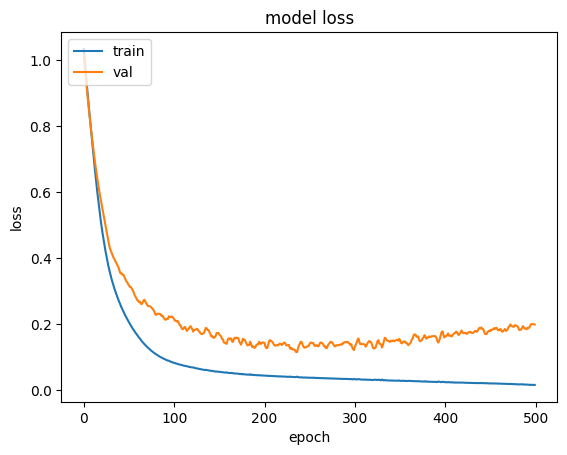

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.67      1.00      0.80         6

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.89        30
weighted avg       0.93      0.90      0.90        30



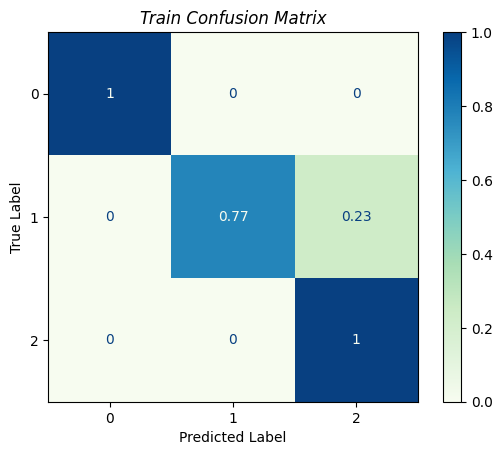

In [6]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
yTestPred  = model.predict(X_test)
yTestPred = np.argmax(yTestPred, axis=1)
yTest = np.asarray(y_test)
print(classification_report(yTest, yTestPred))
cm = confusion_matrix(yTest, yTestPred, normalize="true").round(2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap = plt.cm.GnBu, values_format='g')
plt.title('Train Confusion Matrix',style="italic")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()